In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
#pip install keras
#pip install tensorflow 
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Google_test_data.csv to Google_test_data.csv
Saving Google_train_data.csv to Google_train_data.csv


In [4]:
data = pd.read_csv('Google_train_data.csv')
data.head() #to check head of the dataset,it will display the top five rows from the dataset

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
data.info() #to see total no of rows and column in dataset and the data types of each variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [6]:
#we will do some preprocessing of data to trasfer our closing price variable into numeric type
#drop the non available data
#keep only the close column for only trainning the data
data["Close"]=pd.to_numeric(data.Close,errors='coerce') #it is use to convert the close column into numeric
data = data.dropna() #drop the missing values
trainData = data.iloc[:,4:5].values

In [7]:
data.info() #once again see the datatypes chek the datatype of close earlier it was object now it is float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [8]:
#rescale our data into values between 0 and 1 for better performences for that use mimmax scaler function and give the range
#use fit_transform method to transforms the values
#printting the shape of my trainnig data
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [9]:
#prepare data for training

#1.we need to prepare input sequences with 60 timesteps of xtrain data alongwith the respective ytrain labels
#2.adding another axis for the back size 
#since the input for an Lstm network is a 3d tensor so it will have a sequential length,timestep,backsize
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)



In [10]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [11]:
#build a model containing 4 layers of LSTM network all followed by the dropout layer
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [12]:
#train the data  20 itration
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 11s - loss: 0.0555 - 11s/epoch - 316ms/step
Epoch 2/20
35/35 - 5s - loss: 0.0136 - 5s/epoch - 132ms/step
Epoch 3/20
35/35 - 5s - loss: 0.0105 - 5s/epoch - 133ms/step
Epoch 4/20
35/35 - 5s - loss: 0.0090 - 5s/epoch - 131ms/step
Epoch 5/20
35/35 - 5s - loss: 0.0080 - 5s/epoch - 132ms/step
Epoch 6/20
35/35 - 5s - loss: 0.0079 - 5s/epoch - 134ms/step
Epoch 7/20
35/35 - 5s - loss: 0.0072 - 5s/epoch - 135ms/step
Epoch 8/20
35/35 - 5s - loss: 0.0073 - 5s/epoch - 135ms/step
Epoch 9/20
35/35 - 5s - loss: 0.0067 - 5s/epoch - 142ms/step
Epoch 10/20
35/35 - 5s - loss: 0.0066 - 5s/epoch - 134ms/step
Epoch 11/20
35/35 - 5s - loss: 0.0063 - 5s/epoch - 133ms/step
Epoch 12/20
35/35 - 5s - loss: 0.0060 - 5s/epoch - 133ms/step
Epoch 13/20
35/35 - 5s - loss: 0.0058 - 5s/epoch - 132ms/step
Epoch 14/20
35/35 - 5s - loss: 0.0057 - 5s/epoch - 133ms/step
Epoch 15/20
35/35 - 5s - loss: 0.0056 - 5s/epoch - 131ms/step
Epoch 16/20
35/35 - 5s - loss: 0.0059 - 5s/epoch - 130ms/step
Epoch 17/20
35/

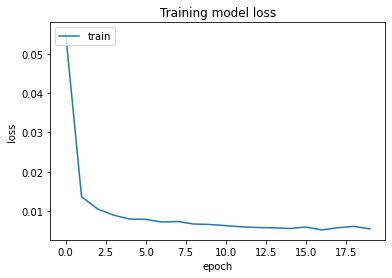

In [13]:
#visualise the loss for each epochs
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [15]:
#test the model using a new dataset
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 

#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape



(192, 60, 1)

In [16]:
#predicting the model output
y_pred = model.predict(X_test)
y_pred #to check the values of y 


array([[1.1771933],
       [1.1776526],
       [1.1848608],
       [1.1982301],
       [1.2129946],
       [1.2217696],
       [1.2214706],
       [1.2140522],
       [1.2056086],
       [1.1995373],
       [1.1915734],
       [1.1808127],
       [1.1697459],
       [1.158748 ],
       [1.1517817],
       [1.1499703],
       [1.1582328],
       [1.1768857],
       [1.2033695],
       [1.2346059],
       [1.2585665],
       [1.271739 ],
       [1.2701919],
       [1.2559876],
       [1.2355877],
       [1.2162268],
       [1.2018101],
       [1.1909484],
       [1.1790359],
       [1.1662107],
       [1.1530876],
       [1.1392193],
       [1.1215812],
       [1.100105 ],
       [1.0850127],
       [1.0821741],
       [1.0911667],
       [1.1082362],
       [1.1300484],
       [1.1490425],
       [1.1681362],
       [1.1881201],
       [1.2090548],
       [1.2291585],
       [1.2457323],
       [1.2552989],
       [1.2553352],
       [1.2510645],
       [1.2468842],
       [1.2460766],


In [17]:
#plot the data
predicted_price = sc.inverse_transform(y_pred)

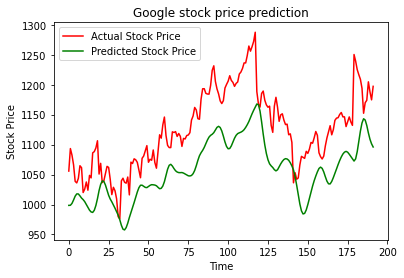

In [18]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

